In [2]:
#exploring various factors that may influence opening choices

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scripts import cleanup
from scripts import rating
df = cleanup.clean("../../data/raw/DataSet_aksingal.csv")
df

,rated,winner,white_rating,black_rating,moves,opening_eco,opening_name,opening_ply
0,False,white,1500,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,True,black,1322,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,True,white,1496,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,True,white,1439,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,True,white,1523,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5
...,...,...,...,...,...,...,...,...
20053,True,white,1691,1220,d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...,A80,Dutch Defense,2
20054,True,black,1233,1196,d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...,A41,Queen's Pawn,2
20055,True,white,1219,1286,d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...,D00,Queen's Pawn Game: Mason Attack,3
20056,True,white,1360,1227,e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...,B07,Pirc Defense,4


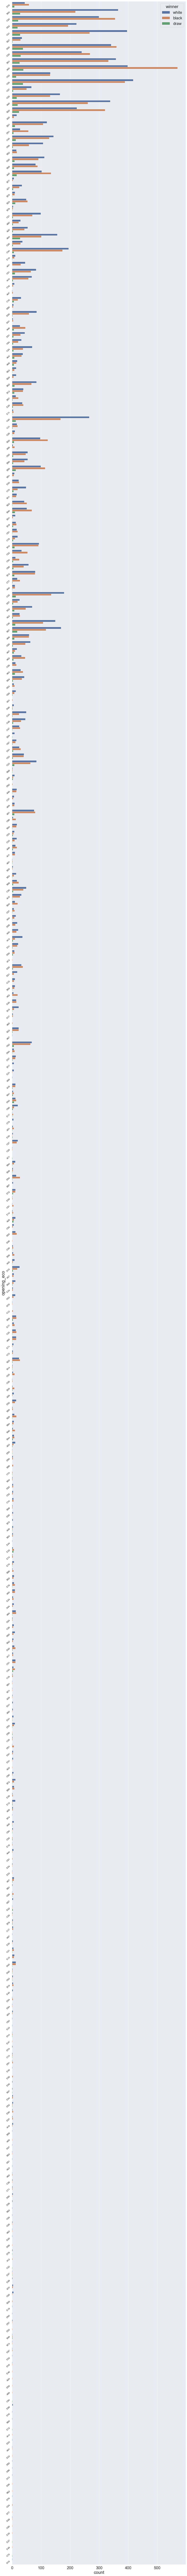

<Figure size 432x288 with 0 Axes>

In [3]:
#checking if there is a connection between different openings and game results
fig = plt.gcf()
fig.set_size_inches(15, 200)
sns.set(font_scale=2)
plot = sns.countplot(y="opening_eco", hue="winner", data = df)
plot.set_yticklabels(plot.get_yticklabels(), rotation=40, ha="right", fontsize = 12)
plt.tight_layout()
plt.show()
plt.savefig('preferred_openings_by_colour')
#Question: Are there opennings that are more preffored over others?

## Result ##

Most games have an ***uncommon or unusual opening*** that doesn't follow a set pattern this can bee seen by the graph for ***A00***
Out of the common openings, ***Sicilian Defence (various ecos between B20-B99)*** and ***French Defence (C00)*** are the most popular. This is interesting as most biginners my experience prefer the ***Ruy Lopez (C60)***


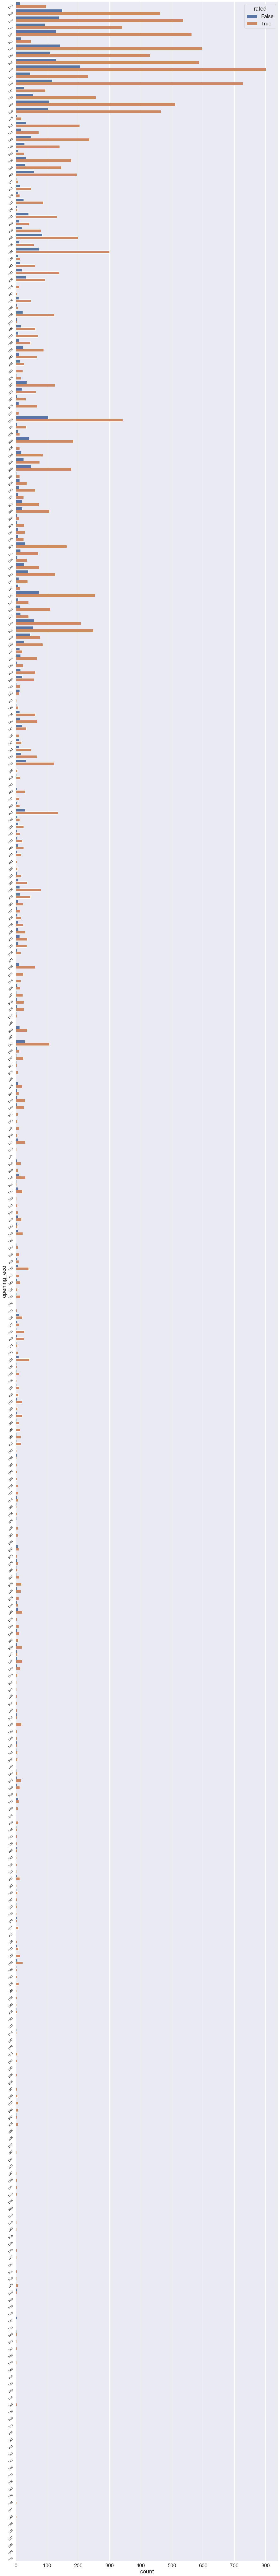

In [4]:
#checking for relationship between opening used in rated vs unrated games
fig2 = plt.gcf()
fig2.set_size_inches(20, 200)
sns.set(font_scale=2)
plot2 = sns.countplot(y="opening_eco", hue="rated", data = df)
plot2.set_yticklabels(plot2.get_yticklabels(), rotation=40, ha="right", fontsize = 12)
plt.show()

#Question: Are some openings much m,ore popular in rated games

## Result ##

Overall most openings are used more in rated games than in unrated ones but this can also be due to our dataset consisting of ***mostly*** rated games.
*However* **D60 AND C68** variations of Queens Gambit and Ruy Lopez Exchange are favoured more in  unrated games. 

In [ ]:
#comparing mean difference between rating and opening played in game
df2 = rating.modify(df)
df2.head()

In [ ]:
df_opnVrat = df2.loc[:, ["absolute_rating", "opening_eco"]]
df_opnVrat = df_opnVrat.groupby(["opening_eco"], as_index = False).mean()
df_opnVrat = df_opnVrat.replace(0, np.nan)
df_opnVrat = df_opnVrat.dropna(how='all', axis=0)
fig_vio = plt.gcf()
fig_vio.set_size_inches(20, 200)
plot = sns.violinplot(x=df_opnVrat['absolute_rating'], y = df['opening_eco'], data=df_opnVrat, scale = "width")

#Question: Are some openings preffered when there is a large gap in ratings of white vs black 

## Result ##

The openings that show the most variation are:
- Queen's Gambit Declined, Semi-Tarrasch (D41)
- Ruy Lopez Main (C70)
- Caro-Kann, Two Knights, 3...Bg4 (B11)
- Bishop's Opening (C23)

This makes sense as these openings are amongst the first learnt by players and very versitile.